# Importing Required Libraries

In [20]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
import matplotlib.pyplot as plt

# Importing the HR Dataset

In [2]:
#Import Data
Emp_Perf=pd.read_excel("Hr_data.xls") # Dataset used
Emp_Perf.head(5)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


# Exploratory Data Analysis

## Checking Datatypes, Count and Null Values in Dataset

In [3]:
Emp_Perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

## Number of Rows and Columns in Dataset

In [4]:
Emp_Perf.shape

(1200, 28)

## Check for any missing / null value in the data

In [5]:
Emp_Perf.isna().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

## Dropping Duplicated Values

In [6]:
Emp_Perf[Emp_Perf.duplicated()]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


# Drop Unwanted Variables

In [7]:
Emp_Perf.drop('EmpNumber', axis='columns', inplace=True)
Emp_Perf.head(3)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4


# Visualizing some Categorical Varibles

## Visualizing on Education Background

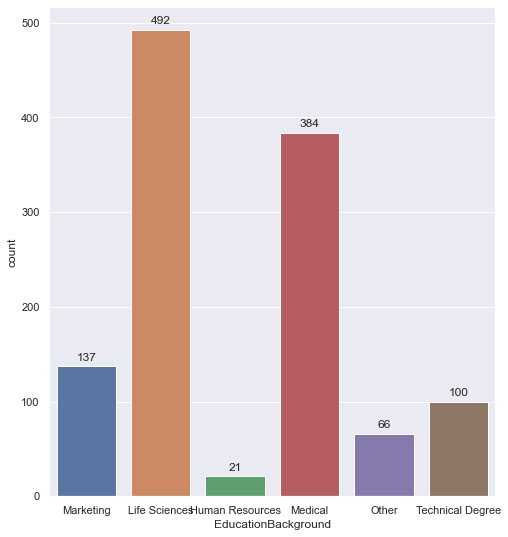

In [15]:
#Analyze Educational Background
sns.set(rc={'figure.figsize':(8,9)})
splot=sns.countplot(x="EducationBackground", data=Emp_Perf)
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
				   
				   

## Distribution of Employee's at Department Level

In [9]:
# Distribution of the employees in the various departments:
Emp_Perf['EmpDepartment'].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

## Department Wise Employee Performance Ratings

In [10]:
# Department-wise performance rating of the employees:
Emp_Perf.groupby("EmpDepartment")['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

## Visualizing Gender count in Dataset based on Performance Ratings

Total Headcount in the dataset: 1200


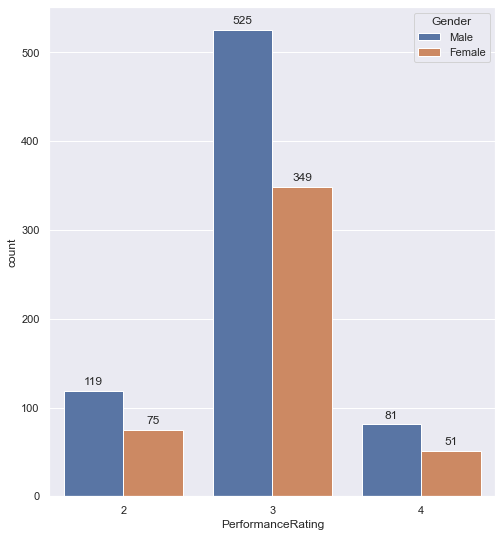

In [18]:
print("Total Headcount in the dataset: " + str(len(Emp_Perf.index)))
#Analyse the data
splot=sns.countplot(x="PerformanceRating", hue= "Gender" , data=Emp_Perf)
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
				   
				   

## Visualizing Age Distribution

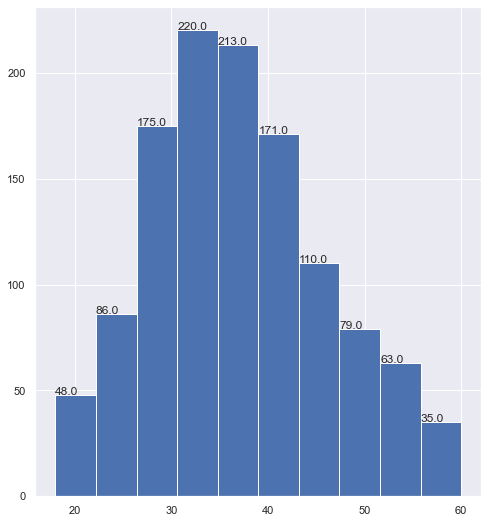

In [21]:
your_bins=10
data=Emp_Perf["Age"]
arr=plt.hist(data,bins=your_bins)
for i in range(your_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

## Visualizing Promotions Trends

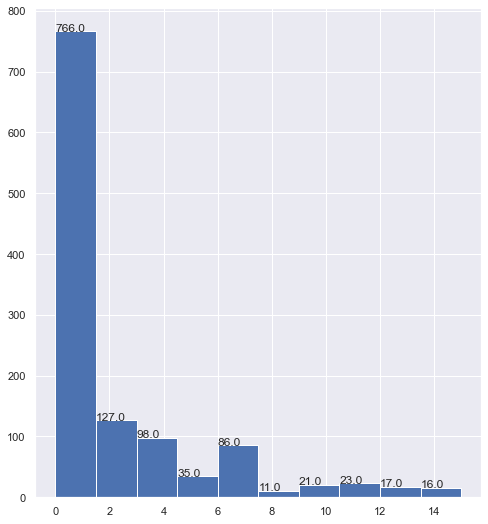

In [22]:
your_bins=10
data=Emp_Perf["YearsSinceLastPromotion"]
arr=plt.hist(data,bins=your_bins)
for i in range(your_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

### From above plot it can be inferred that a whole lot of employees were being promoted quite often i.e. in 0–1.5 years.

In [23]:
Emp_Perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfaction

In [24]:
#Missing Values
Emp_Perf.isnull().values.any()

False

In [25]:
#Check Target Variable values
Emp_Perf["PerformanceRating"].unique()

array([3, 4, 2])

# Split numeric & categorical data and change categorical data with Label Encoding

# Categorical Data

In [26]:
#All the Categorical Features

cat_col = Emp_Perf[['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime','Attrition']]
cat_col.head()

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No


# Visualizing Attrition Count in Dataset

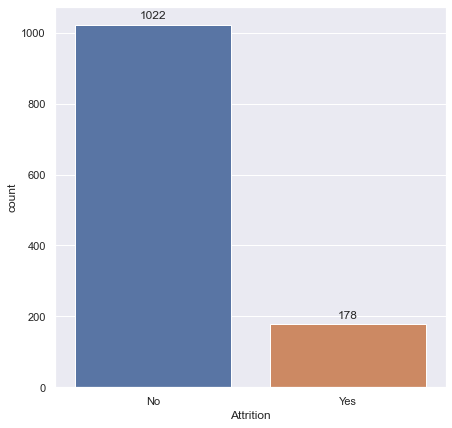

In [28]:
sns.set(rc={'figure.figsize':(7,7)})
splot=sns.countplot(x="Attrition", data=cat_col)
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
				   
				   

# Printing all the Categorical Variable Datatypes and their Unique Values

In [29]:
for column in cat_col.columns:
    if cat_col[column].dtype == object:
        print(str(column) + ':' + str(cat_col[column].unique()))
        print(cat_col[column].value_counts())
        print('______________________________________________________________________________________')

Gender:['Male' 'Female']
Male      725
Female    475
Name: Gender, dtype: int64
______________________________________________________________________________________
EducationBackground:['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64
______________________________________________________________________________________
MaritalStatus:['Single' 'Married' 'Divorced']
Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64
______________________________________________________________________________________
EmpDepartment:['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance       

# Numerical Data

In [30]:
#Numerical Data

num_data= Emp_Perf[Emp_Perf.columns[~Emp_Perf.columns.isin(cat_col)]]
num_data.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3


# Label Encoding

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
#cat_col = le.fit_transform(cat_col,axis=1)
cat_col_data=cat_col.apply(le.fit_transform)


#  Label Encoded Data

In [33]:
cat_col_data.head()

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,1,2,2,5,13,2,0,0
1,1,2,2,5,13,2,0,0
2,1,1,1,5,13,1,1,0
3,1,0,0,3,8,2,0,0
4,1,2,2,5,13,2,0,0


# Merging the Label Encoded Data and Numeric Data

In [34]:
Emp_Perf1=pd.concat([cat_col_data,num_data],axis=1)
Emp_Perf1.head(10)

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition,Age,DistanceFromHome,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,1,2,2,5,13,2,0,0,32,10,...,12,4,10,2,2,10,7,0,8,3
1,1,2,2,5,13,2,0,0,47,14,...,12,4,20,2,3,7,7,1,7,3
2,1,1,1,5,13,1,1,0,40,5,...,21,3,20,2,3,18,13,1,12,4
3,1,0,0,3,8,2,0,0,41,10,...,15,2,23,2,2,21,6,12,6,3
4,1,2,2,5,13,2,0,0,60,16,...,14,4,10,1,3,2,2,2,2,3
5,1,1,0,1,3,1,0,0,27,10,...,21,3,9,4,2,9,7,1,7,4
6,1,2,1,5,14,2,0,0,50,8,...,15,4,4,2,3,2,2,2,2,3
7,0,1,2,1,3,2,1,1,28,1,...,13,4,10,4,3,7,7,3,7,3
8,0,1,1,1,3,0,0,0,36,8,...,14,1,10,2,3,8,7,0,5,3
9,0,1,2,1,3,2,1,0,38,1,...,14,4,10,4,4,1,0,0,0,3


In [35]:
Emp_Perf1.shape

(1200, 27)

 # Setting up Target and Predictor Variables

In [36]:
col = list(Emp_Perf1)
predictors = Emp_Perf1[col[1:26]]
target = Emp_Perf1['PerformanceRating']

In [37]:

predictors.head()


,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition,Age,DistanceFromHome,EmpEducationLevel,...,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,2,5,13,2,0,0,32,10,3,...,1,12,4,10,2,2,10,7,0,8
1,2,2,5,13,2,0,0,47,14,4,...,2,12,4,20,2,3,7,7,1,7
2,1,1,5,13,1,1,0,40,5,4,...,5,21,3,20,2,3,18,13,1,12
3,0,0,3,8,2,0,0,41,10,4,...,3,15,2,23,2,2,21,6,12,6
4,2,2,5,13,2,0,0,60,16,4,...,8,14,4,10,1,3,2,2,2,2


In [38]:
target.head(5)

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

# Univarate Analysis

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features.

In [39]:
#apply SelectKBest class to extract top 10 best features
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(predictors,target)


In [40]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(predictors.columns)

In [41]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

In [42]:
#printing the scores of each features 
featureScores

,Features,Score
0,EducationBackground,0.151941
1,MaritalStatus,1.232011
2,EmpDepartment,46.787010
3,EmpJobRole,35.896167
4,BusinessTravelFrequency,1.011364
5,OverTime,7.963530
6,Attrition,2.186305
7,Age,5.170313
8,DistanceFromHome,18.650010
9,EmpEducationLevel,0.314038


In [43]:
#print 10 best features
print(featureScores.nlargest(10,'Score'))  

                        Features       Score
16      EmpLastSalaryHikePercent  297.136917
23       YearsSinceLastPromotion  238.004284
21  ExperienceYearsAtThisCompany  133.602068
22  ExperienceYearsInCurrentRole  120.860036
10    EmpEnvironmentSatisfaction  110.691319
24          YearsWithCurrManager   87.483471
2                  EmpDepartment   46.787010
18    TotalWorkExperienceInYears   41.593037
3                     EmpJobRole   35.896167
8               DistanceFromHome   18.650010


# Feature Importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(predictors,target)

ExtraTreesClassifier()

In [45]:
#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

[0.02436269 0.02369668 0.04475131 0.03179647 0.02131164 0.01608881
 0.01294588 0.03203538 0.02923081 0.02742187 0.15274493 0.03104993
 0.02362428 0.02382672 0.02674112 0.02603892 0.16465494 0.02443239
 0.02787703 0.02585805 0.03459081 0.03193868 0.04162372 0.07033956
 0.0310174 ]


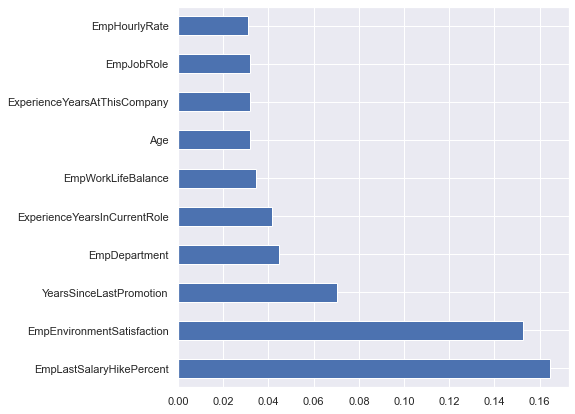

In [46]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=predictors.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
# Concatenation of Numeric Data (Non - Categorical Data)
df = Emp_Perf1[['EmpLastSalaryHikePercent','EmpEnvironmentSatisfaction', 'YearsSinceLastPromotion', 'EmpDepartment', 'ExperienceYearsInCurrentRole', 'EmpJobRole', 'YearsWithCurrManager', 'DistanceFromHome','ExperienceYearsAtThisCompany','NumCompaniesWorked','PerformanceRating']]
df.head()

# Modelling

In [ ]:
### Independent and Dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X.head(5)

In [ ]:
y.head()

# Splitting the Dataset into Training and Test sets

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the Data into Training and Test set with test size of 0.2
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Applying Random Forest Classifier

In [ ]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier1=RandomForestClassifier()
classifier1.fit(X_train,y_train)

# Prediction of Test Cases using Random Forest

In [ ]:
## Prediction
y_pred1=classifier1.predict(X_test)

# Applying Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)

# Prediction of Test Cases using Decision Tree

In [ ]:
## Prediction
y_pred2=classifier2.predict(X_test)

#  Applying LightGBM Classifier

In [ ]:
#LGBM
import lightgbm as lgb
classifier4 = lgb.LGBMClassifier()
classifier4.fit(X_train, y_train)

# Prediction of Test Cases using LightGBM

In [ ]:
y_pred4=classifier4.predict(X_test)

#  Applying XGBoost Classifier

In [ ]:
# Applying XG Boost Classifier
from xgboost import XGBClassifier
classifier3 = XGBClassifier()
classifier3.fit(X_train, y_train)

# Prediction of Test Cases using XGBoost

In [ ]:
## Prediction
y_pred3=classifier3.predict(X_test)

# Model Accuracy and Results for Random Forest Classifier

In [ ]:
#Confusion matrix in order to predict actual and predicted values
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred1)
print(cm)
print(classification_report(y_test,y_pred1))

# Model Accuracy and Results for Decision Tree Classifier

In [ ]:
#Confusion matrix in order to predict actual and predicted values
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred2)
print(cm)
print(classification_report(y_test,y_pred2))

# Model Accuracy and Results for XGBoost Classifier

In [ ]:
#Confusion matrix in order to predict actual and predicted values - XGBoost
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred3)
print(cm)
print(classification_report(y_test,y_pred3))

# Model Accuracy and Results for Light GBM Classifier

In [ ]:
#Confusion matrix in order to predict actual and predicted values
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred4)
print(cm)
print(classification_report(y_test,y_pred4))

# Applying 10-Fold Cross Validation on Random Forest Classifier

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [47]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter



pd.set_option('display.max_columns', 0) #this allow us to visualize all columns

In [48]:
smt = SMOTE(random_state=0, sampling_strategy = 0.4)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

NameError: name 'X_train' is not defined

# Inference 

There are very few mis -classifications and the precision rates for all the values are very high as is seen from the snapshot here and it implies that our model is highly accurate.

# Creating a Pickle file for Random Forest Classifier Deployment on Flask

In [ ]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("/content/drive/MyDrive/FINAL_HR_PROJECTS/classifier1.pkl","wb") #Pickle file created with name classfier.pkl and stored in the working directory
pickle.dump(classifier1, pickle_out)
pickle_out.close()

In [ ]:
classifier1.predict([[12,4,0,5,7,13,8,10,10,1]]) # Testing model with input on 10 top Features

In [ ]:
classifier2.predict([[12,4,0,5,7,13,8,10,10,1]]) # Testing model with input on 10 top Features

# Creating a Pickle file for Decision Tree Classifier Deployment on Flask

In [ ]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("/content/drive/MyDrive/FINAL_HR_PROJECTS/classifier2.pkl","wb") #Pickle file created with name classfier.pkl and stored in the working directory
pickle.dump(classifier2, pickle_out)
pickle_out.close()

# Creating a Pickle file for XG Boost Classifier Deployment on Flask

In [ ]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("/content/drive/MyDrive/FINAL_HR_PROJECTS/classifier3.pkl","wb") #Pickle file created with name classfier.pkl and stored in the working directory
pickle.dump(classifier3, pickle_out)
pickle_out.close()

# Creating a Pickle file for Light GBM Classifer Deployment on Flask

In [ ]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("/content/drive/MyDrive/FINAL_HR_PROJECTS/classifier4.pkl","wb") #Pickle file created with name classfier.pkl and stored in the working directory
pickle.dump(classifier4, pickle_out)
pickle_out.close()